<b> Name: Ajay Kumar <br> Hamoye ID: 147bffea7681f000 </b>

# Analysis of Food Balance Sheet in Africa

### Importing Libraries

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

<b> Complete Analysis will have following steps: </b> <br>
 1. Loading of Data.  <br>
 2. Cleaning of Data. <br>
 3. Exploration of Data.

## 1. Loading of Data

In [2]:
df=pd.read_csv('FBS_Africa.csv', encoding = "ISO-8859-1") # I have saved the data locally to my computer.

In [3]:
df.head() # Watching top 5 rows

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


Let's check shape of our data frame i.e. number of rows and columns.

In [4]:
df.shape

(60943, 12)

Okay! So we have 60943 records (rows) and 12 features (columns).

In [5]:
df.columns.values # Getting names of all the columns.

array(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code',
       'Element', 'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
      dtype=object)

In [6]:
df.dtypes # Checking data types  of each column.

Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Unit             object
Y2014           float64
Y2015           float64
Y2016           float64
Y2017           float64
Y2018           float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


<b> Here we have found some null values records in columns Y2014, Y2015, Y2016, Y2017 and Y2018 </b>

In [8]:
# Descriptive statistical values of numerical columns/fields.
df.describe() # For Finding mean and standard deviation for 2015.

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [9]:
df.corr() #Finding correlation among attributes.

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


In [10]:
df.duplicated().any() # Checking for duplicate rows.

False

In [11]:
#checking of missing values.
df.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [12]:
gr=df.groupby('Item').sum() # Finding total sum of Animal Fat produced in 2014 and 2017.

In [13]:
gr.head(50)

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Item,,,,,,,,
"Alcohol, Non-Food",38447,752497,1515090,2403.00,2180.00,2223.00,2348.00,2293.00
Alcoholic Beverages,75016,1649136,2171381,102410.11,98783.72,96958.75,95581.06,97847.27
Animal Products,18060,397035,90990,11935.65,11811.73,11661.69,11547.65,11578.61
Animal fats,85279,1882494,2567303,209460.54,200675.72,183314.22,269617.53,269648.27
Apples and products,69280,1352989,1920418,9499.23,10559.15,9853.26,10198.90,9640.51
"Aquatic Animals, Others",47420,966381,1139179,14.55,9.26,6.17,5.92,5.92
Aquatic Plants,51178,1057275,1278386,507.29,631.23,470.21,452.02,452.02
"Aquatic Products, Other",52570,1160712,1320249,519.62,638.42,475.08,456.65,456.65
Bananas,68496,1338880,1894890,53267.31,55046.76,54376.07,53008.82,55549.23


In [14]:
gr2=df.groupby('Element').sum() # Checking different elements value among differnt years.

In [15]:
gr2.head(50)

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,708993,14197445,28068795,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,599910,11840553,26026133,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),675050,13535000,3435732,10225.56,10235.74,10102.77,10253.84,10258.69
Feed,176272,3538507,7282199,216927.89,225050.22,228958.65,223705.68,233489.68
Food,663295,13285035,25406622,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),674057,13511060,3329296,454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),658446,13185401,3163725,49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,688174,13795966,28834929,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,274353,5424803,10292107,153223.00,155439.00,157787.00,160614.00,163902.00


In [16]:
a= df['Area'].unique() # Names of unique countries. 

In [17]:
a

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Egypt',
       'Eswatini', 'Ethiopia', 'Ethiopia PDR', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'South Africa', 'Sudan', 'Sudan (former)', 'Togo', 'Tunisia',
       'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [18]:
len(a) # Number of unique countries.

49

In [19]:
filt= (df['Area']== 'Algeria') #filtering for area Algeria

In [20]:
import_check= df[filt].groupby('Element').sum() # For Checking import quantity in Algeria in 2018

In [21]:
import_check.head(50)

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,464,311204,614916,83755.94,85972.86,87157.61,86810.42,90023.42
Export Quantity,392,264011,579278,1328.64,1104.62,1340.22,1494.54,811.54
Fat supply quantity (g/capita/day),432,291489,73872,320.19,317.40,309.54,320.74,309.09
Feed,88,58967,121462,9656.04,10308.00,9903.00,9571.00,10668.00
Food,420,282744,539910,60582.69,61693.49,63081.43,62785.33,63736.33
Food supply (kcal/capita/day),432,291489,71712,13500.00,13512.00,13483.00,13363.00,13288.00
Food supply quantity (kg/capita/yr),420,282744,67725,1556.45,1552.81,1555.77,1516.94,1509.28
Import Quantity,448,301030,628432,34940.12,37841.91,36736.08,36059.29,36238.29
Losses,208,139857,266396,7231.00,7471.00,7405.00,7428.00,7708.00


## 2. Cleaning of Data

As we have noticed we have missing data in our dataset so either we have to drop those records or we have to fill them with appropriapte values like mean or median.

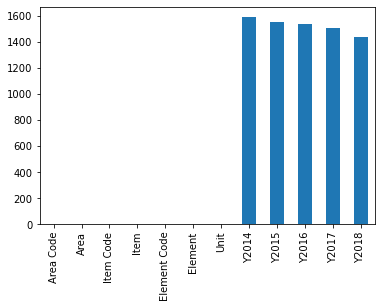

In [22]:
df.isna().sum().plot(kind="bar")
plt.show() # Bar plots of null fields.

<b> Roughly 2.5% null values records are present in columns Y2014, Y2015, Y2016, Y2017 and Y2018 </b>

In [23]:
# filling missing values with median values.
for column in df.columns:
    if column in ['Y2014','Y2015', 'Y2016','Y2017','Y2018' ]:
        df[column].fillna(df[column].median(),inplace=True)

In [24]:
#checking of null values replacement.
df.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y2014           0
Y2015           0
Y2016           0
Y2017           0
Y2018           0
dtype: int64

<b> So, we have successfully replaced null values with median of respective coloumns. </b>

## 2. Exploration of data

Now let's visualaize some plots among different fields and groups.

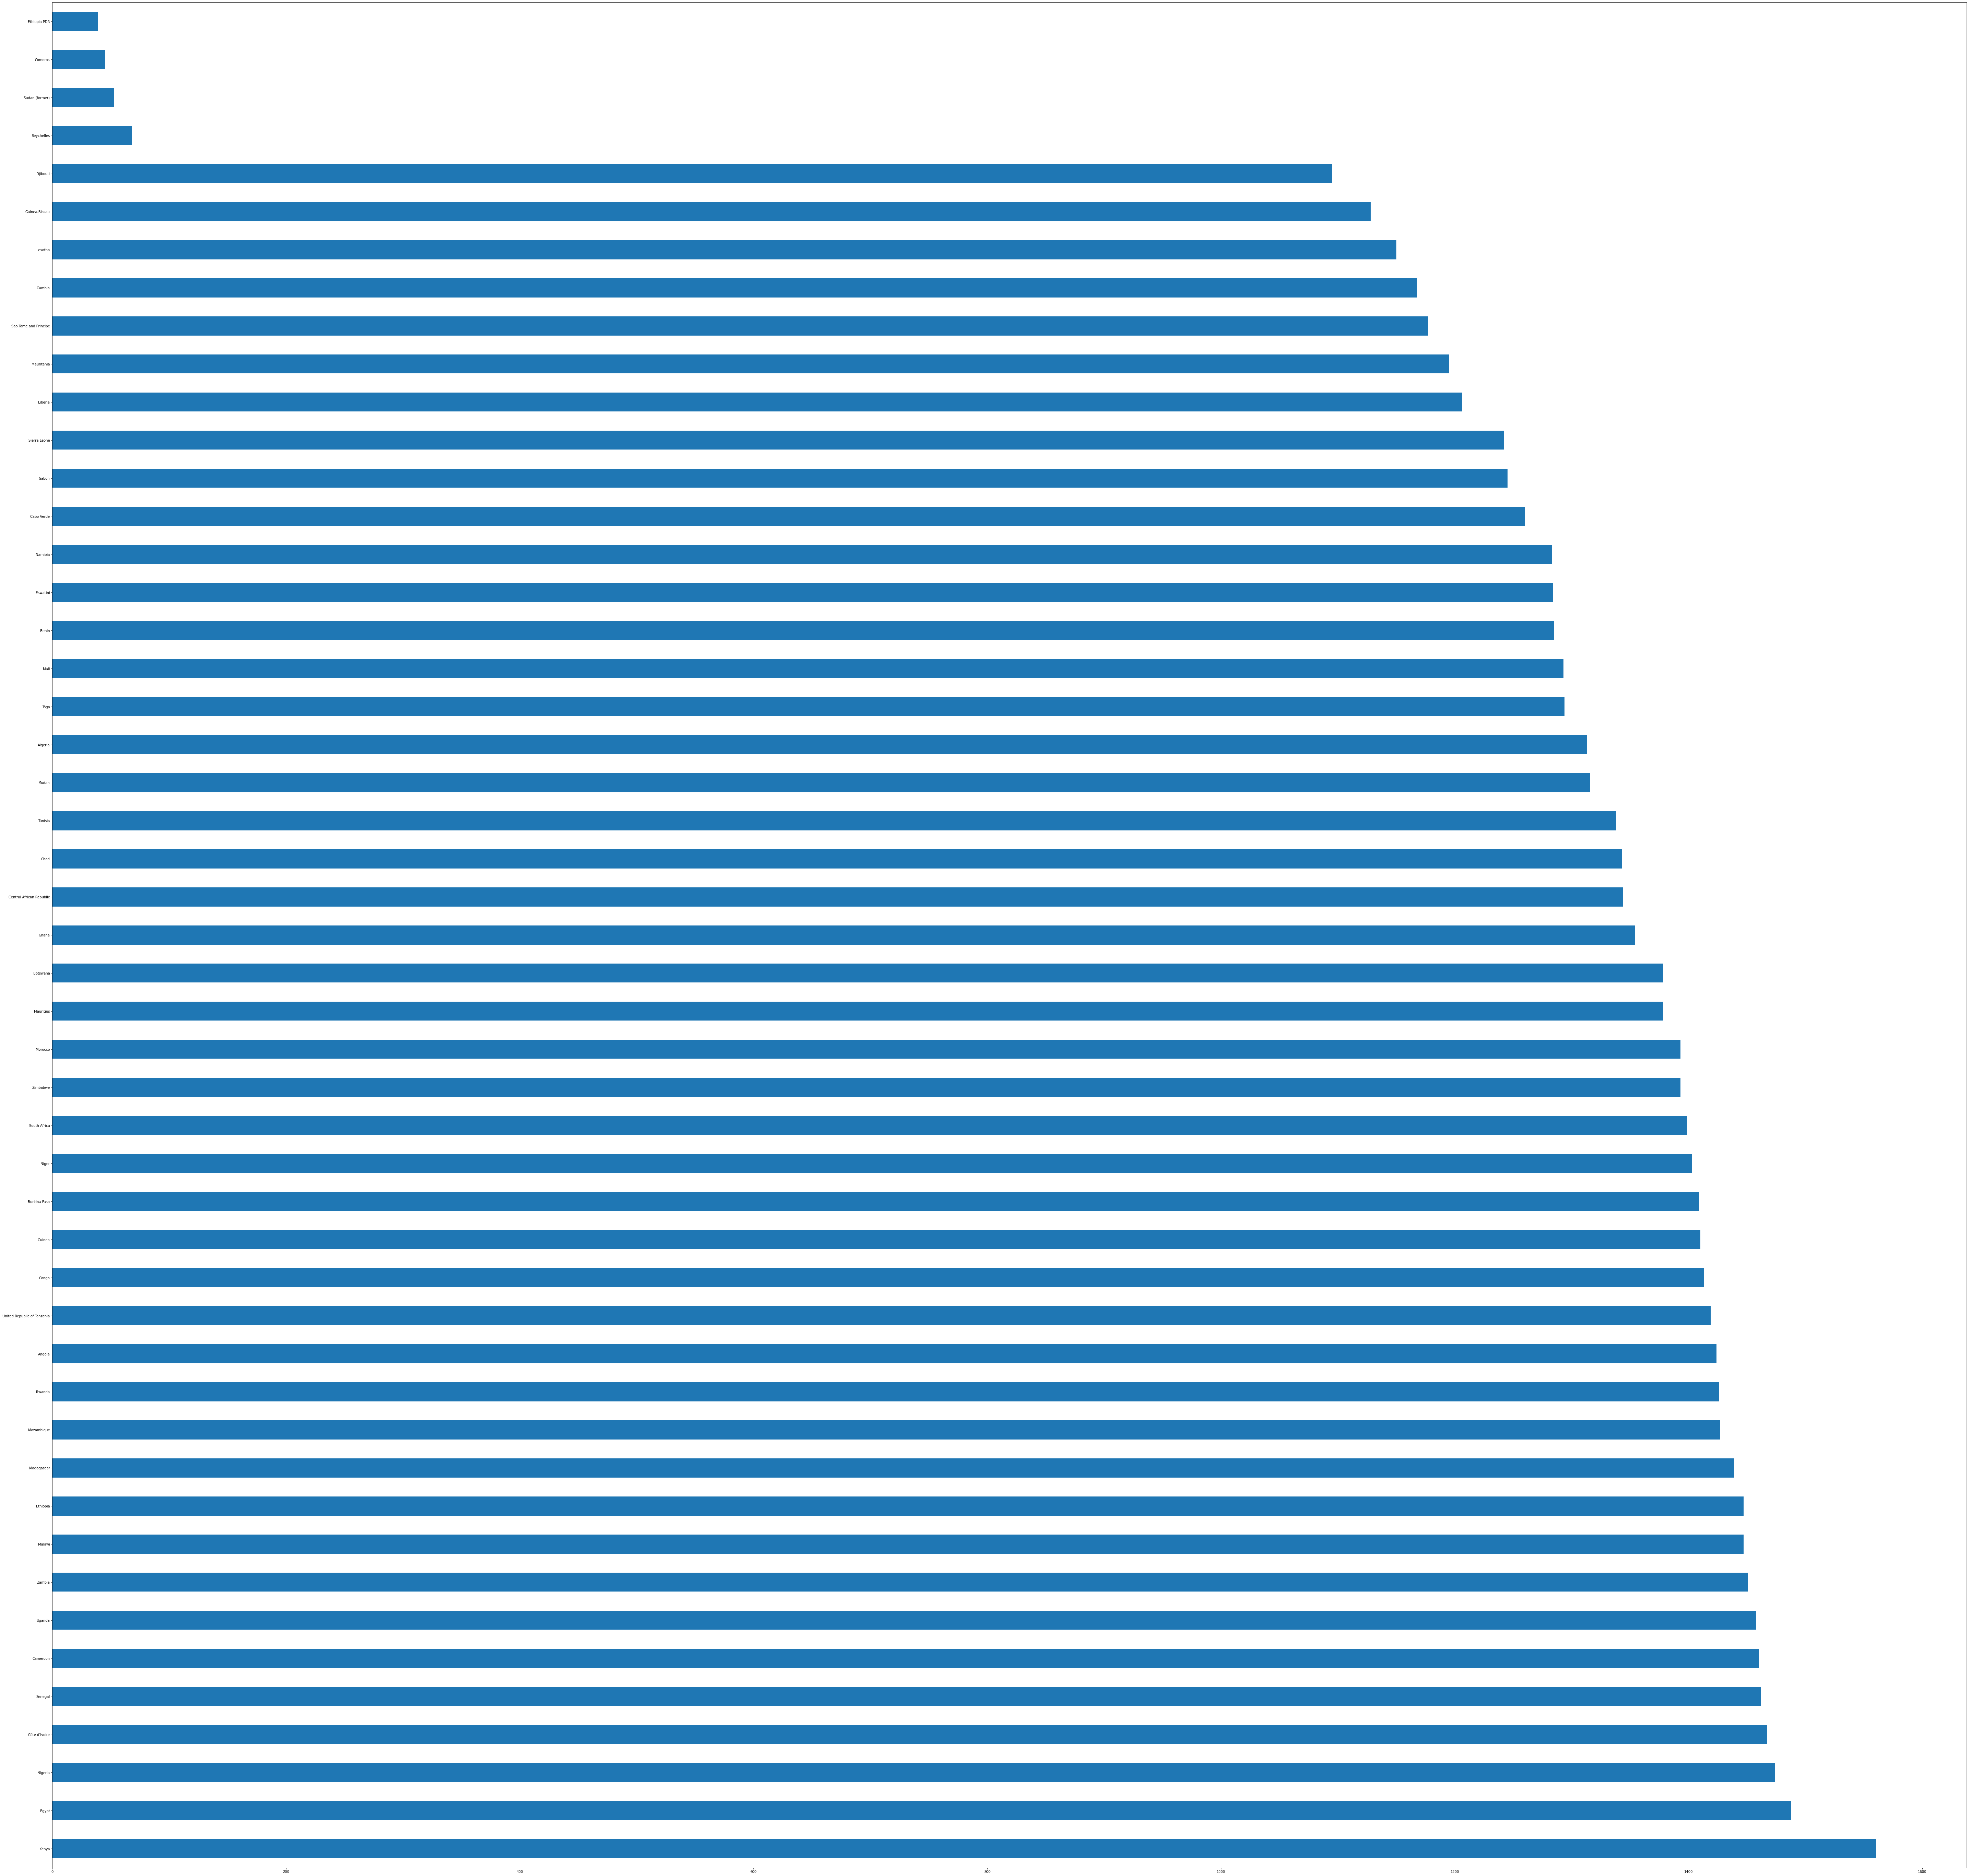

In [25]:
df.Area.value_counts().plot(kind='barh', figsize=(100,100)) # Area Wise distribution of Data fraame.
plt.show()

In [26]:
P1= df.drop(['Area Code','Item Code','Element Code'], axis=1)

In [27]:
P1

,Area,Item,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,Algeria,Population,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,Algeria,Population,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,Algeria,Grand Total,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,Algeria,Grand Total,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,Algeria,Grand Total,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28
...,...,...,...,...,...,...,...,...,...
60938,Zimbabwe,Miscellaneous,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,Zimbabwe,Miscellaneous,Food supply quantity (kg/capita/yr),kg,3.06,3.33,2.35,1.33,1.08
60940,Zimbabwe,Miscellaneous,Food supply (kcal/capita/day),kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,Zimbabwe,Miscellaneous,Protein supply quantity (g/capita/day),g/capita/day,0.10,0.11,0.08,0.04,0.04


In [28]:
P2=P1.groupby('Area').sum()

In [29]:
P2

,Y2014,Y2015,Y2016,Y2017,Y2018
Area,,,,,
Algeria,313380.01,324062.00,326010.53,325647.67,341731.03
Angola,208588.56,209569.35,214728.20,229161.27,235208.64
Benin,118053.94,108183.13,117965.83,124774.42,124963.01
Botswana,22341.45,23025.57,22971.69,22102.30,23130.27
Burkina Faso,105053.76,102704.18,107703.63,101857.67,112973.24
Cabo Verde,14579.55,14541.41,14574.20,14657.44,14627.36
Cameroon,217631.18,225222.08,231715.72,232032.33,233024.89
Central African Republic,28742.98,28889.18,29456.94,29945.20,30104.09
Chad,65945.48,65839.08,72680.00,71600.88,72284.90


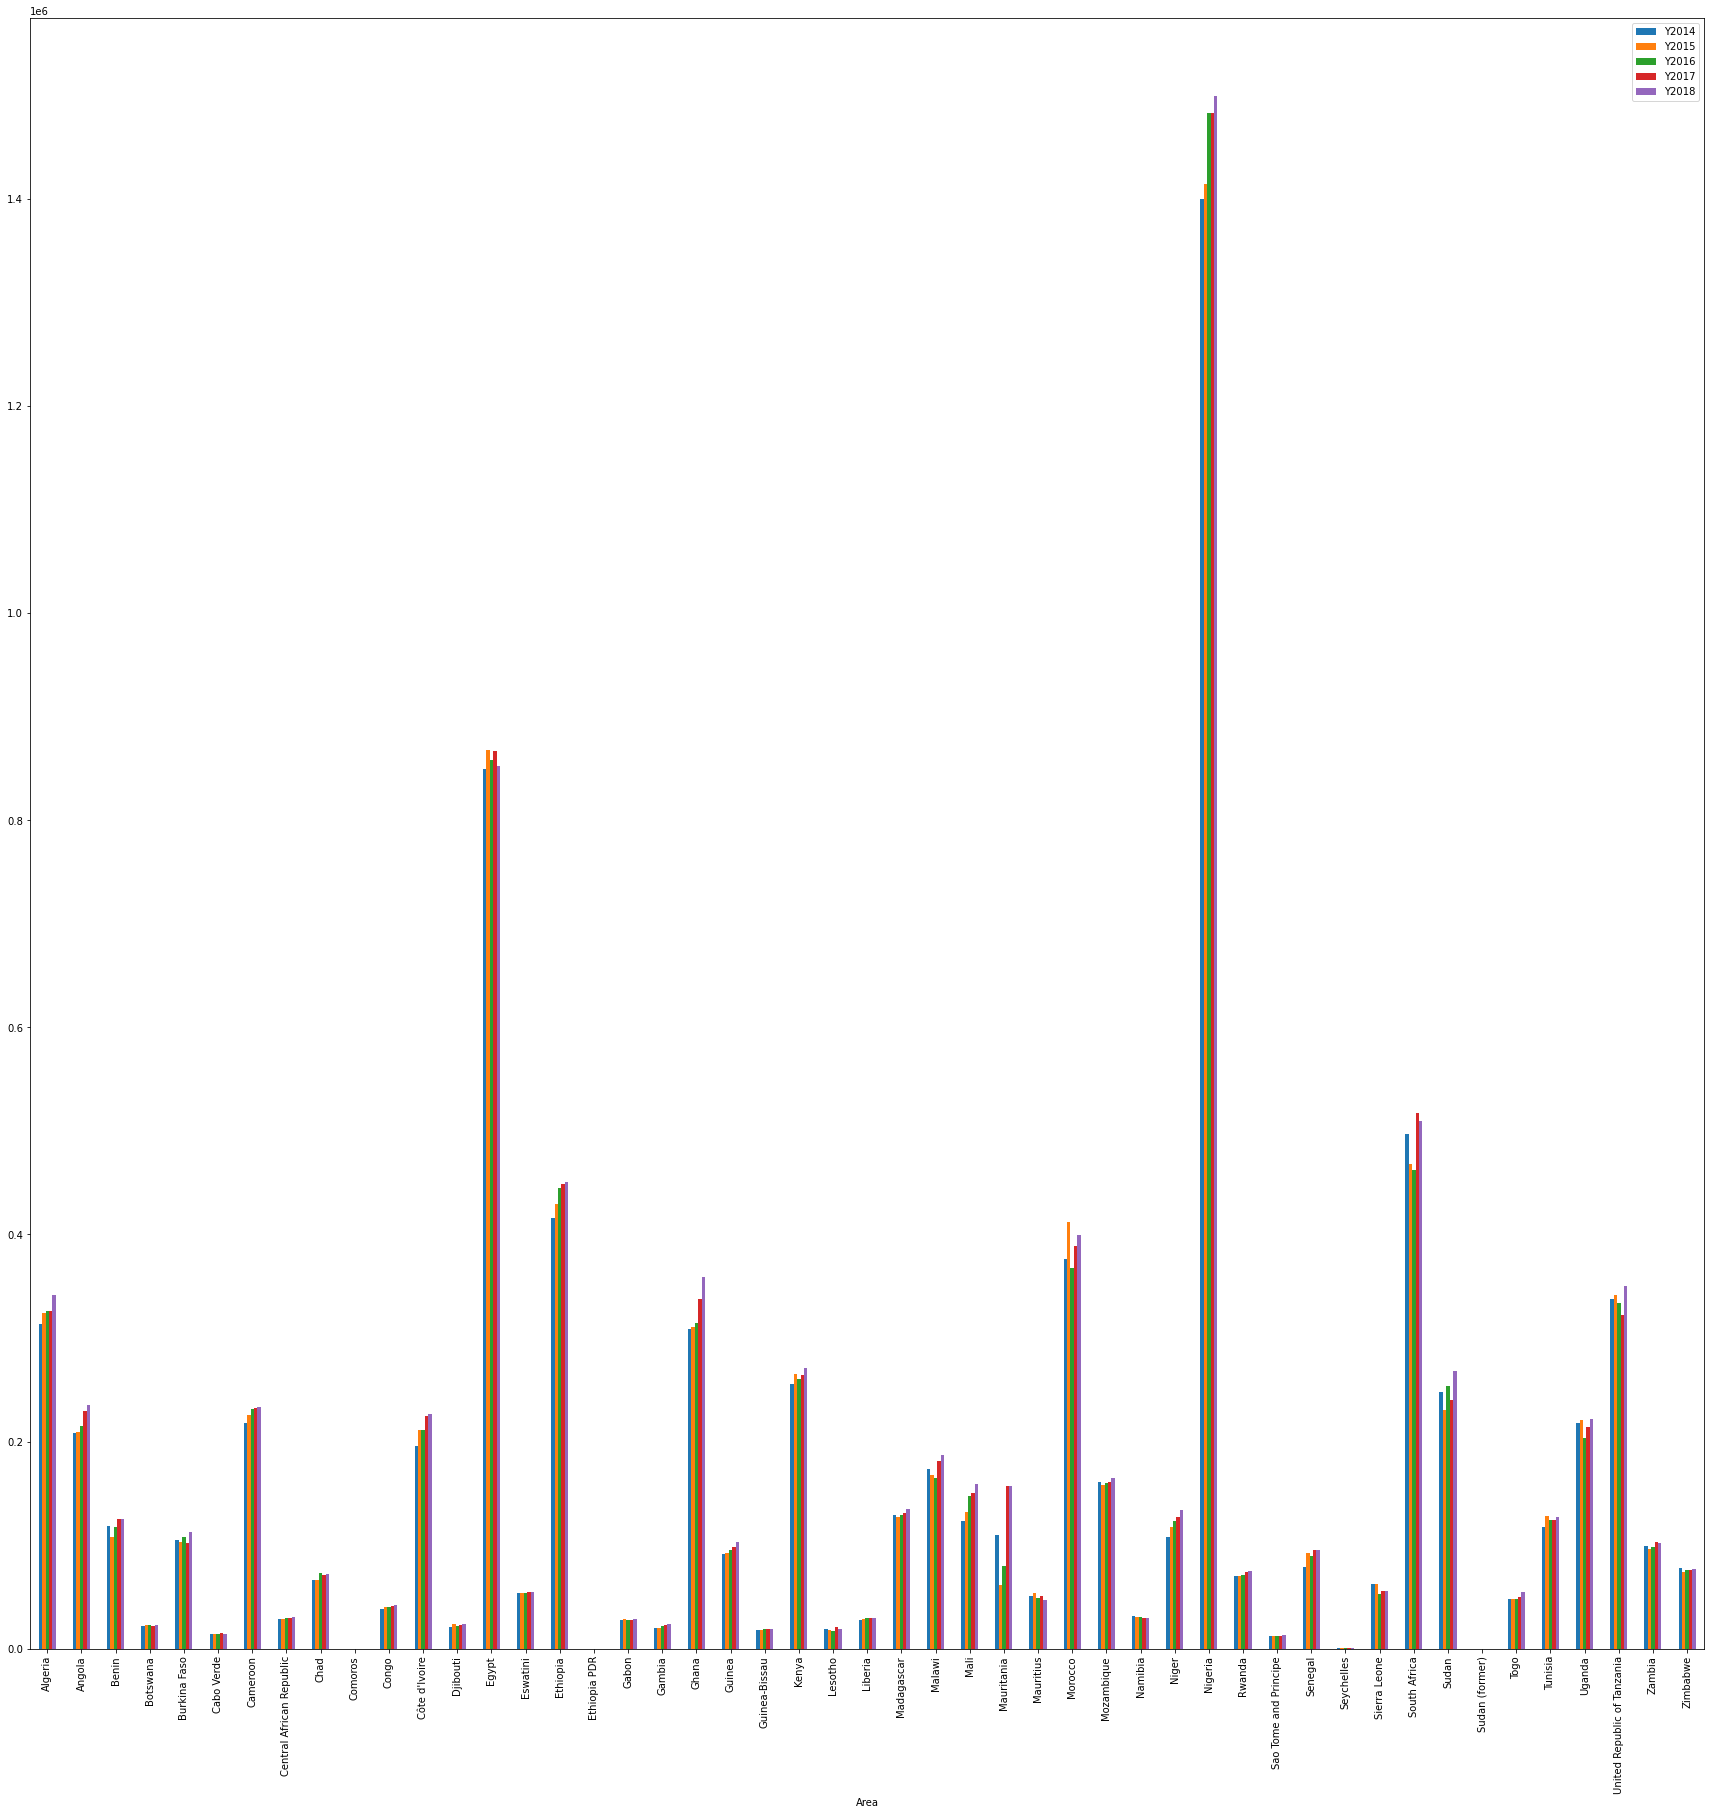

In [30]:
P2.plot(kind='bar', figsize=(30,30)) # Plotting of number of records for different countries corresponding to different years.
plt.show()

In [31]:
P3=P1.groupby('Element').sum()

In [32]:
P3

,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,
Domestic supply quantity,1996720.94,2021497.55,2044846.30,2088201.80,2161194.83
Export Quantity,150087.51,157670.39,151980.46,182413.10,181647.79
Fat supply quantity (g/capita/day),10230.78,10239.66,10106.21,10257.94,10261.21
Feed,216937.16,225061.58,228966.97,223716.28,233496.26
Food,1212336.54,1232364.30,1247024.65,1258891.18,1303843.24
Food supply (kcal/capita/day),454263.03,453387.72,451814.08,454685.90,455264.15
Food supply quantity (kg/capita/yr),49654.68,49348.33,48987.76,48692.94,49058.81
Import Quantity,274164.28,267036.70,286601.26,294580.09,288010.67
Losses,153223.00,155439.00,157787.00,160614.00,163902.07


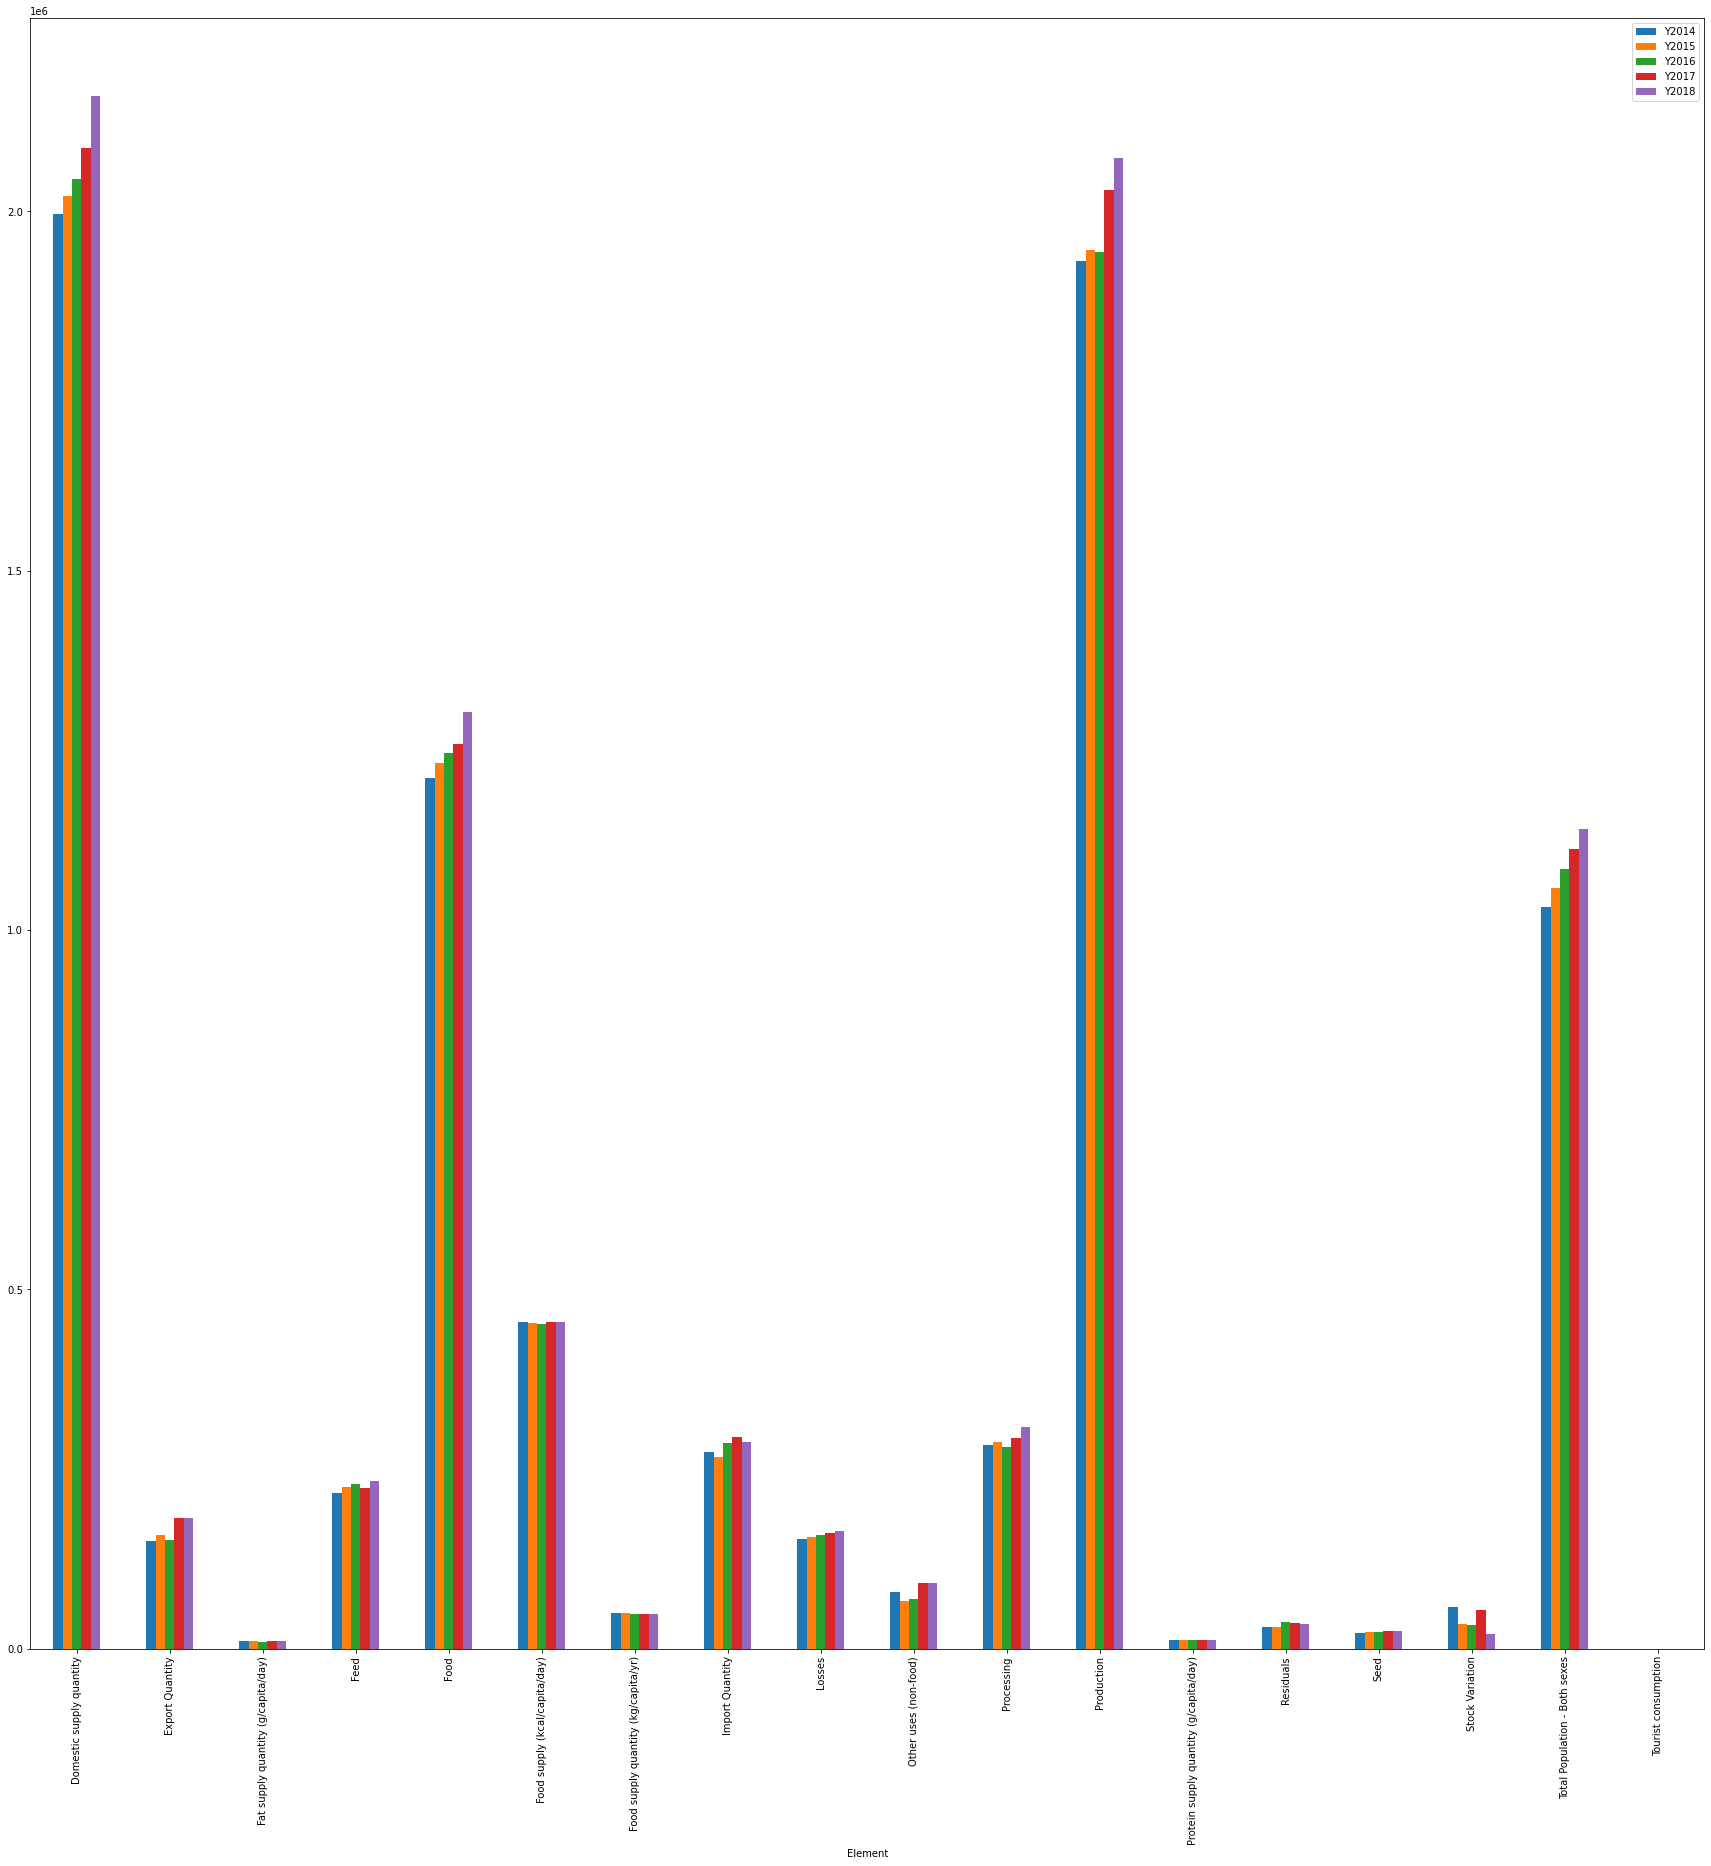

In [33]:
P3.plot(kind='bar', figsize=(30,30)) # Plotting of Elements with respect to Years.
plt.show()

In [34]:
P4=P1.groupby('Item').sum()

In [35]:
P4.head(50)

,Y2014,Y2015,Y2016,Y2017,Y2018
Item,,,,,
"Alcohol, Non-Food",2403.72,2180.96,2223.72,2349.00,2293.70
Alcoholic Beverages,102410.29,98784.12,96959.15,95581.46,97847.48
Animal Products,11935.65,11811.73,11661.69,11547.65,11578.61
Animal fats,209460.90,200676.20,183314.70,269617.83,269648.48
Apples and products,9499.86,10559.63,9853.66,10199.50,9641.14
"Aquatic Animals, Others",14.55,9.26,6.17,5.92,5.92
Aquatic Plants,507.29,631.23,470.21,452.02,452.02
"Aquatic Products, Other",519.62,638.42,475.08,456.65,456.65
Bananas,53269.11,55048.60,54377.19,53011.02,55549.79


<AxesSubplot:xlabel='Item'>

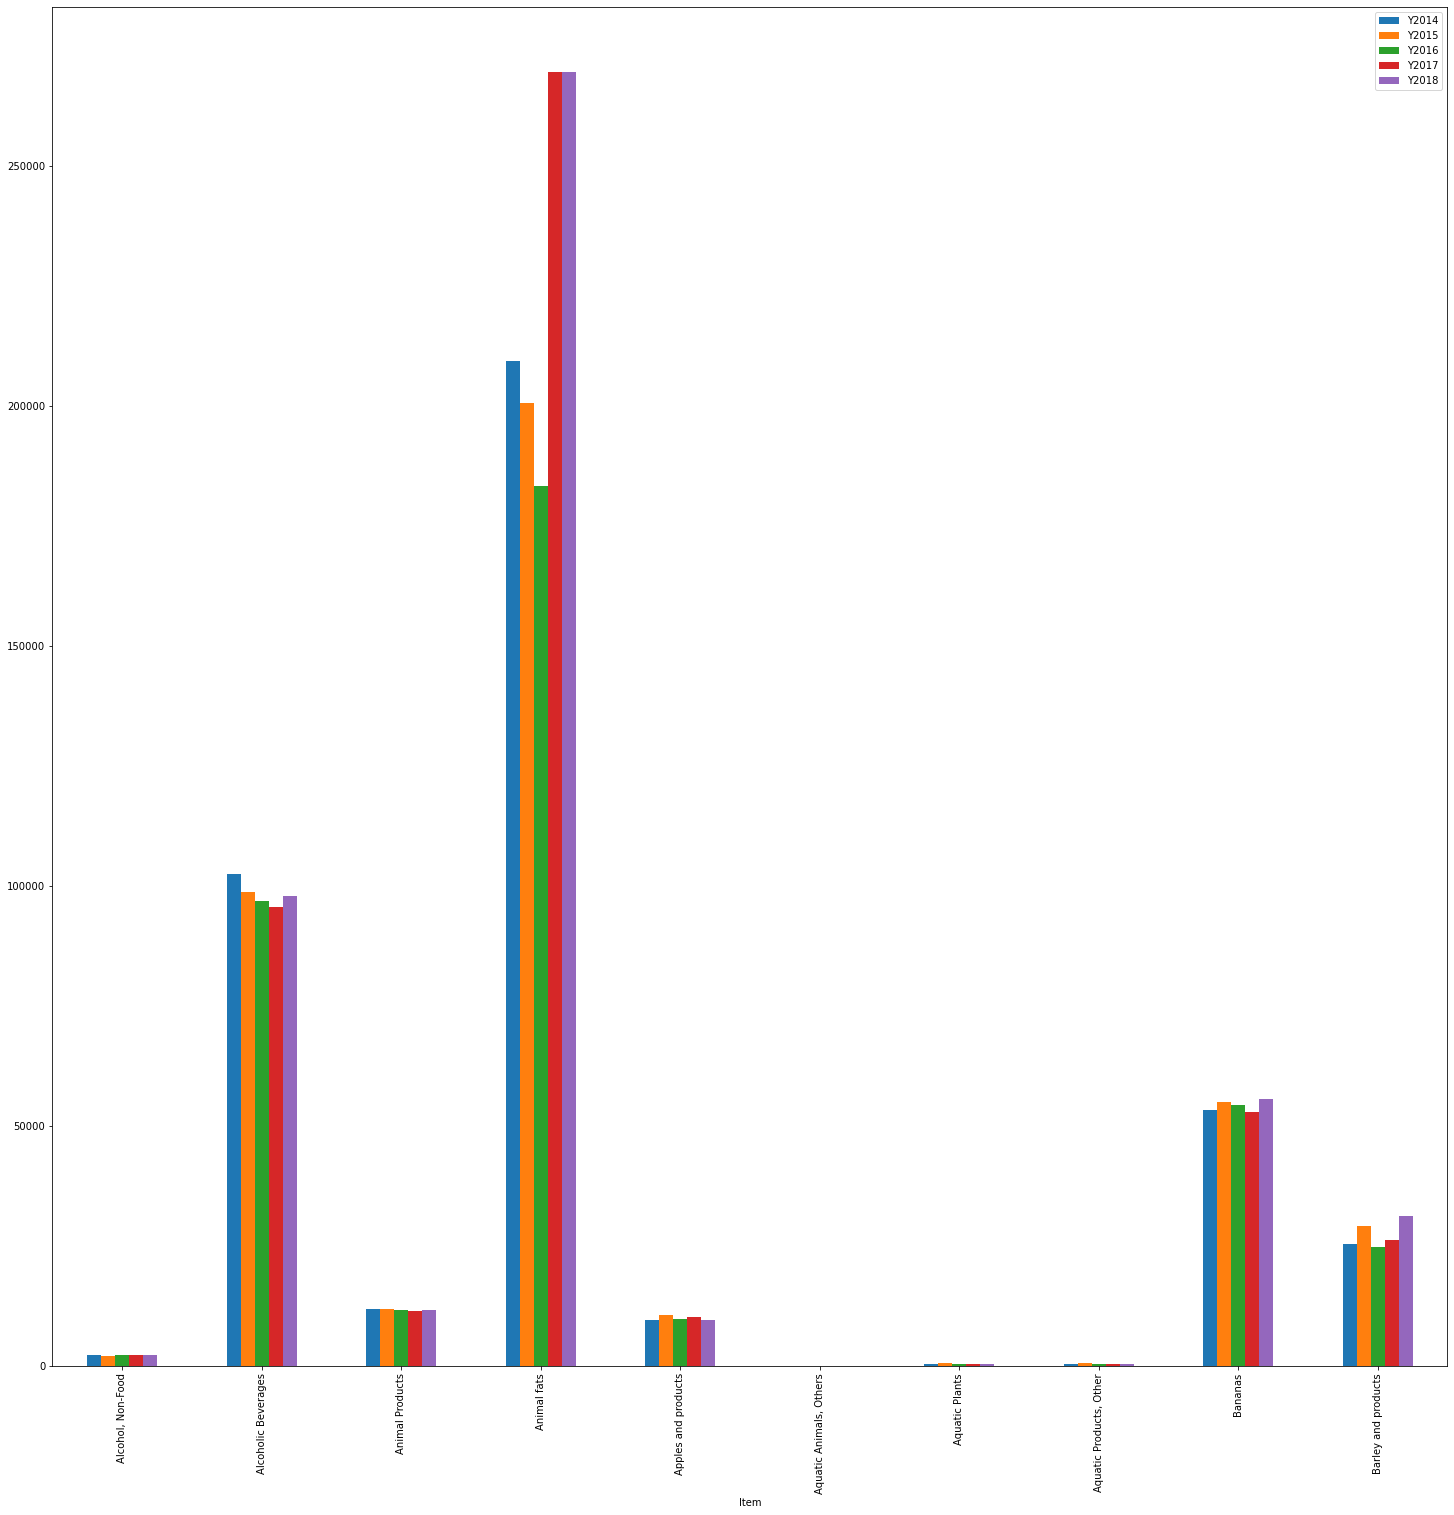

In [36]:
P4[:10].plot(kind='bar', figsize=(25,25)) # Plotting of first 10 items.